In [3]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.nn.modules import Module
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import copy
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

retraining_epochs = 50

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [36]:
def mse_loss(input, target):
    target = (nn.Softmax()(Variable(target))).data
    input = (nn.Softmax()(Variable(input))).data
    return torch.sum((input - target).pow(2)) / input.numel()

def ce_loss(input, target):
    target = (nn.Softmax()(Variable(target))).data
    input = (nn.Softmax()(Variable(input))).data
    outputs = input.log()
    return -torch.mean(torch.sum(target * outputs, dim=-1))

def msel(input, target):
    return torch.sum((input - target).pow(2)) / input.numel()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


1


/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


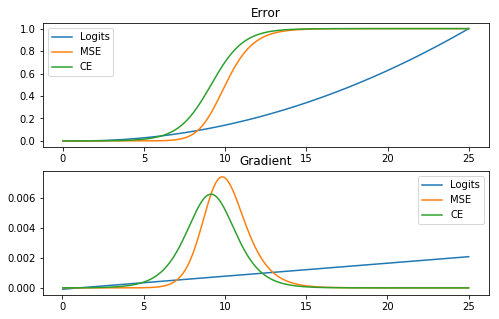

3


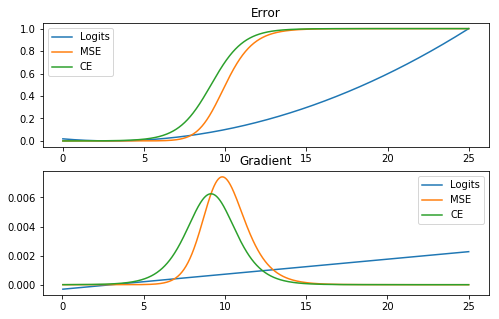

5


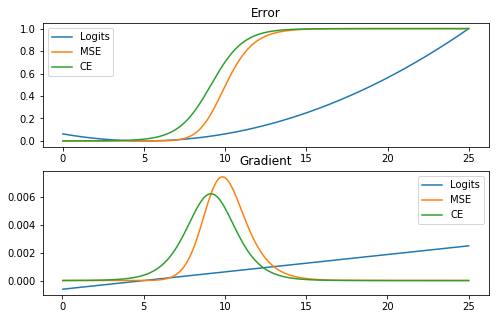

7


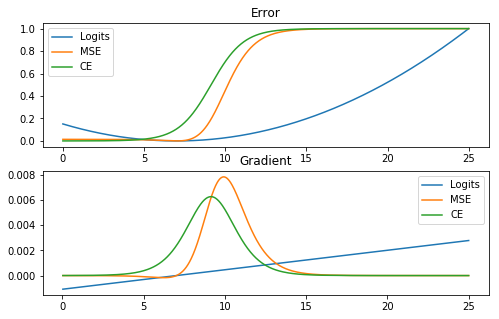

9


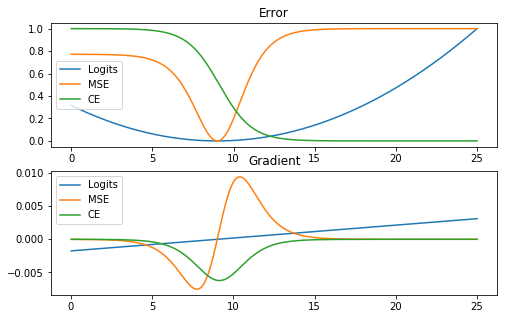

11


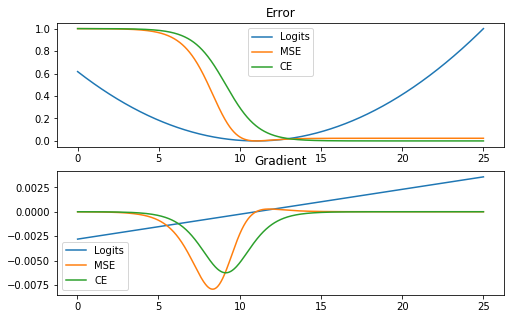

13


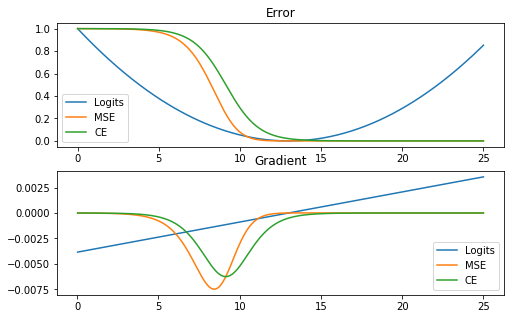

15


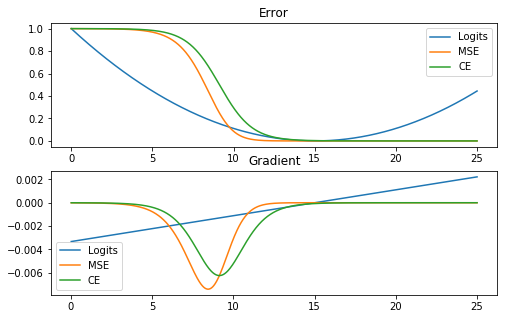

In [141]:
for k in [1, 3, 5, 7, 9, 11, 13, 15]:
    print (k)
    ce_l = []
    logits_l = []
    mse_l = []
    p_range = np.linspace(0, 25, 1001)
    for p in p_range:

        target = torch.Tensor([1, 3, k, 7, 9])
        prediction = torch.Tensor([1, 3, p, 7, 9])

        logits = msel(target, prediction)
        ce = ce_loss(target, prediction)
        mse = mse_loss(target, prediction)

        logits_l.append(float(logits))
        ce_l.append(float(ce))
        mse_l.append(float(mse))

    ll = np.array(logits_l)
    ml = np.array(mse_l)
    cl = np.array(ce_l)

    norm_ll = (ll - ll.min())/(ll.max() - ll.min())
    norm_ml = (ml - ml.min())/(ml.max() - ml.min())
    norm_cl = (cl - cl.min())/(cl.max() - cl.min())

    grad_ll = norm_ll[1:] - norm_ll[:-1]
    grad_ml = norm_ml[1:] - norm_ml[:-1]
    grad_cl = norm_cl[1:] - norm_cl[:-1]
    x_range = p_range[1:]

    plt.figure(figsize=(8, 5))
    plt.subplot(211)
    plt.title("Error")
    plt.plot(p_range, norm_ll, label="Logits")
    plt.plot(p_range, norm_ml, label="MSE")
    plt.plot(p_range, norm_cl, label="CE")
    plt.legend()

    plt.subplot(212)
    plt.title( "Gradient")
    plt.plot(x_range, grad_ll, label="Logits")
    plt.plot(x_range, grad_ml, label="MSE")
    plt.plot(x_range, grad_cl, label="CE")
    plt.legend()
    plt.show()